In [7]:
import pandas as pd
import librosa 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
import matplotlib.pyplot as plt

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1613 - loss: 2.2691 - val_accuracy: 0.2933 - val_loss: 2.0595
Epoch 2/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3307 - loss: 1.9404 - val_accuracy: 0.3200 - val_loss: 1.8558
Epoch 3/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4466 - loss: 1.6696 - val_accuracy: 0.3600 - val_loss: 1.6567
Epoch 4/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4612 - loss: 1.5173 - val_accuracy: 0.4800 - val_loss: 1.4724
Epoch 5/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5031 - loss: 1.3844 - val_accuracy: 0.5133 - val_loss: 1.3606
Epoch 6/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5905 - loss: 1.2351 - val_accuracy: 0.5167 - val_loss: 1.2944
Epoch 7/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5910 - loss: 1.1230 - val_accuracy: 0.5367 - val_loss: 1.2575
Epoch 8/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6199 - loss: 1.0171 - val_accuracy: 0.5867 - val_loss: 

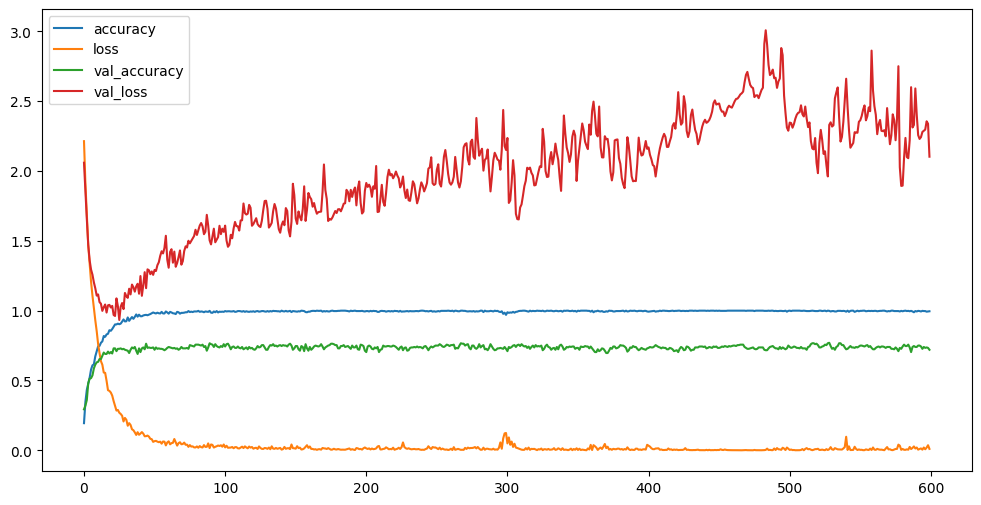

In [8]:
data = pd.read_csv('Data/features_30_sec.csv')
data = data.drop(labels=['filename', 'length'], axis=1)

# X = data.drop('label', axis=1)
# y = data['label']

class_list = data.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)
fit = StandardScaler()
X = fit.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy:", max(history.history['val_accuracy']))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer='adam')
plotValidate(model_history)



In [9]:
model.save('genre_classification_model.h5')

model.save_weights('genre_classification.weights.h5')

In [15]:
from keras.models import load_model
from features_extraction import extract_features

new_data = extract_features('333.wav')
new_song_df = pd.DataFrame([new_data])
new_song_scaled = fit.transform(new_song_df)
model = load_model('genre_classification_model.h5')
model.load_weights('genre_classification.weights.h5')

predictions = model.predict(new_song_scaled)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
